<a href="https://colab.research.google.com/github/SAHIL-143/Deep-Learning/blob/main/Pridiction%20of%20Co2%20emission%20in%20germany%20in%202024%2C%202025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd

# Load your uploaded dataset
df = pd.read_csv("/content/Germany_co2_data.csv")


print(df.head())
print(df.tail())   # check the last few years
print(df.info())

   country  year iso_code  population           gdp  cement_co2  \
0  Germany  1965      DEU    75966964  1.110000e+12      19.880   
1  Germany  1966      DEU    76611028  1.140000e+12      20.356   
2  Germany  1967      DEU    76970793  1.140000e+12      19.211   
3  Germany  1968      DEU    77321278  1.200000e+12      20.261   
4  Germany  1969      DEU    77944023  1.280000e+12      21.003   

   cement_co2_per_capita       co2  co2_growth_abs  co2_growth_prct  ...  \
0                  0.262   960.102          -8.815           -0.910  ...   
1                  0.266   951.422          -8.680           -0.904  ...   
2                  0.250   936.229         -15.193           -1.597  ...   
3                  0.262   984.791          48.561            5.187  ...   
4                  0.269  1052.001          67.210            6.825  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                 4.270   
1     

In [37]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Keep only year and CO2
germany = df[["year", "co2"]].dropna().sort_values("year")

# Scale CO₂ for LSTM
scaler = MinMaxScaler(feature_range=(0,1))
scaled_co2 = scaler.fit_transform(germany["co2"].values.reshape(-1,1))

In [38]:
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(scaled_co2, time_steps)

X = X.reshape((X.shape[0], X.shape[1], 1))  # LSTM format



In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X, y, epochs=1000, batch_size=8, verbose=1)


Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4935
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3219 
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2139 
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1092 
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0488 
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0172 
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0254 
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0143 
Epoch 9/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0150 
Epoch 10/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 
Epoch 11/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0087 
Epoch 12/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 
Epoch 13/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 
Epoch 14/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0088 
Epoch 15/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079 
Epoch

In [41]:
# Start with last 10 years
last_sequence = scaled_co2[-time_steps:]
sequence = last_sequence

future_predictions = []

for _ in range(2):  # predict for 2024 and 2025
    pred = model.predict(sequence.reshape(1, time_steps, 1))
    future_predictions.append(pred[0,0])
    sequence = np.append(sequence[1:], pred).reshape(time_steps, 1)

# Convert back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1,1))

print(f"Predicted CO₂ in 2024: {future_predictions[0,0]:.2f} million tonnes")
print(f"Predicted CO₂ in 2025: {future_predictions[1,0]:.2f} million tonnes")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted CO₂ in 2024: 569.63 million tonnes
Predicted CO₂ in 2025: 511.78 million tonnes


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

Predictions:
59    609.251398
60    603.456025
Name: predicted_mean, dtype: float64


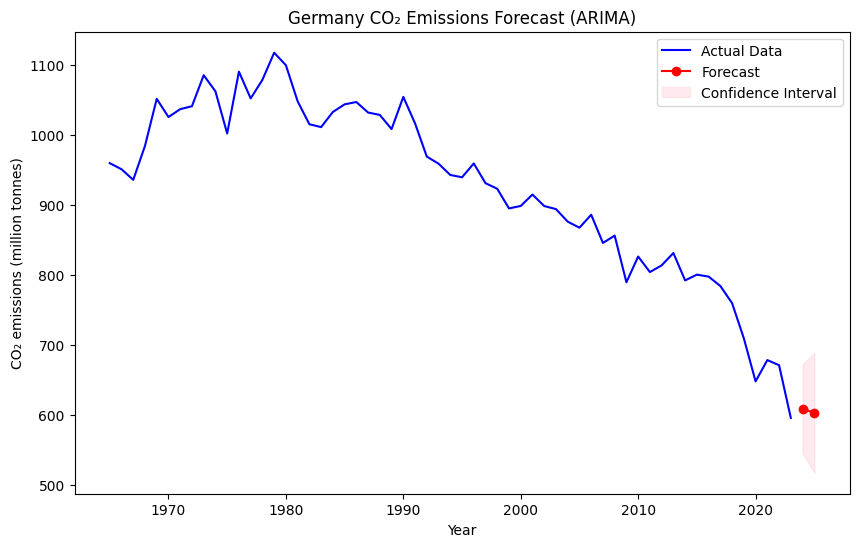

In [42]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
df = pd.read_csv("/content/Germany_co2_data.csv")

# Keep only year and co2
germany = df[["year", "co2"]].dropna().sort_values("year")
germany.set_index("year", inplace=True)

# Fit ARIMA model (order can be tuned)
model = ARIMA(germany["co2"], order=(2,1,2))
model_fit = model.fit()

# Forecast for 2024 & 2025
forecast = model_fit.get_forecast(steps=2)
pred_mean = forecast.predicted_mean
pred_conf = forecast.conf_int()

print("Predictions:")
print(pred_mean)

# Visualization
plt.figure(figsize=(10,6))
plt.plot(germany.index, germany["co2"], label="Actual Data", color="blue")

# Forecast line
future_years = [2024, 2025]
plt.plot(future_years, pred_mean, label="Forecast", color="red", marker="o")

# Confidence interval
plt.fill_between(future_years,
                 pred_conf["lower co2"],
                 pred_conf["upper co2"],
                 color="pink", alpha=0.3, label="Confidence Interval")

plt.title("Germany CO₂ Emissions Forecast (ARIMA)")
plt.xlabel("Year")
plt.ylabel("CO₂ emissions (million tonnes)")
plt.legend()
plt.show()

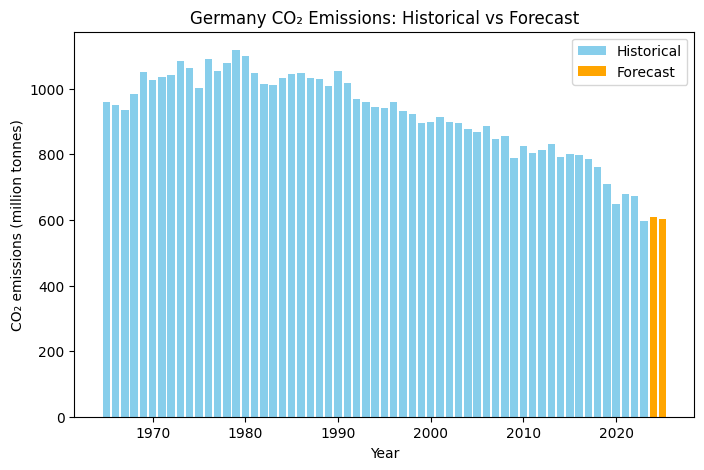

In [43]:
plt.figure(figsize=(8,5))
plt.bar(germany.index, germany["co2"], label="Historical", color="skyblue")
plt.bar([2024, 2025], pred_mean, label="Forecast", color="orange")
plt.title("Germany CO₂ Emissions: Historical vs Forecast")
plt.xlabel("Year")
plt.ylabel("CO₂ emissions (million tonnes)")
plt.legend()
plt.show()

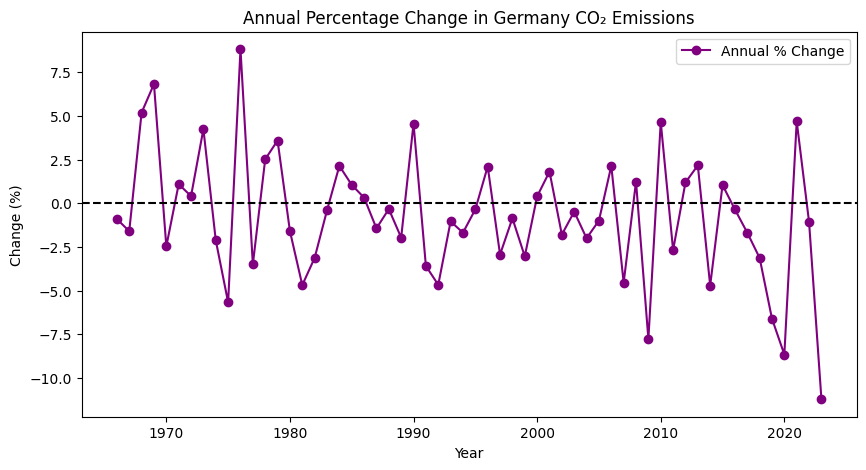

In [45]:
# Compute yearly change
germany["change"] = germany["co2"].pct_change() * 100

plt.figure(figsize=(10,5))
plt.plot(germany.index, germany["change"], marker="o", color="purple", label="Annual % Change")
plt.axhline(0, color="black", linestyle="--")
plt.title("Annual Percentage Change in Germany CO₂ Emissions")
plt.xlabel("Year")
plt.ylabel("Change (%)")
plt.legend()
plt.show()

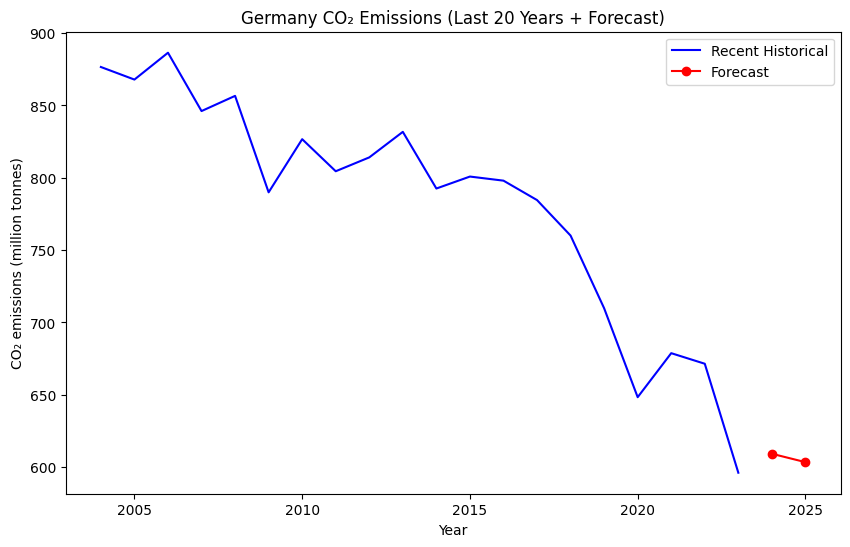

In [46]:
plt.figure(figsize=(10,6))
plt.plot(germany.index[-20:], germany["co2"][-20:], label="Recent Historical", color="blue")
plt.plot([2024, 2025], pred_mean, marker="o", color="red", label="Forecast")
plt.title("Germany CO₂ Emissions (Last 20 Years + Forecast)")
plt.xlabel("Year")
plt.ylabel("CO₂ emissions (million tonnes)")
plt.legend()
plt.show()

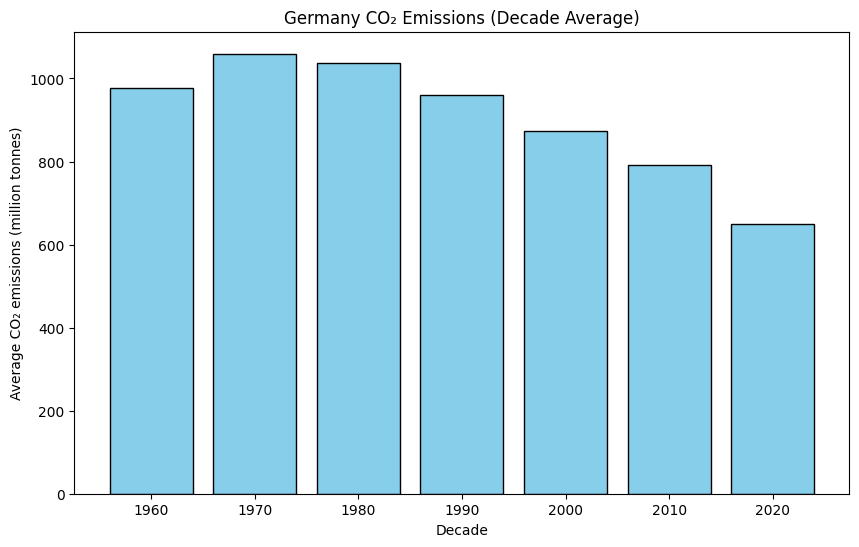

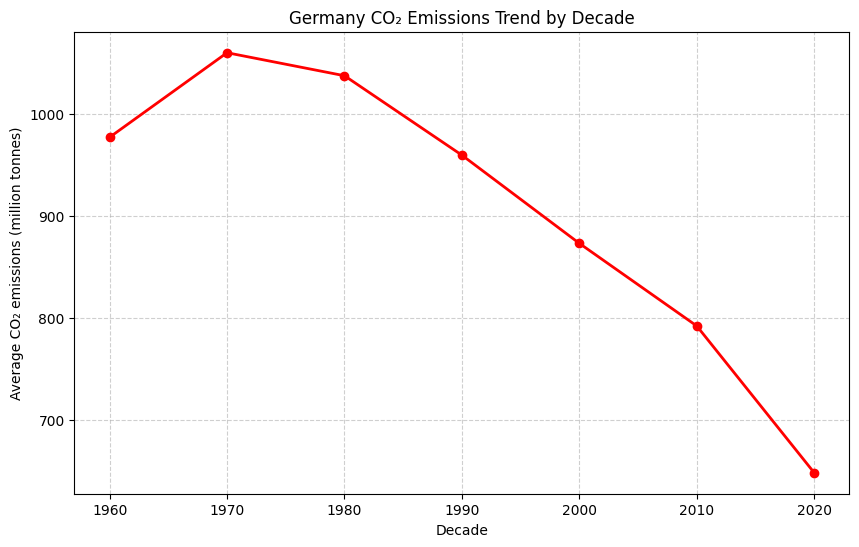

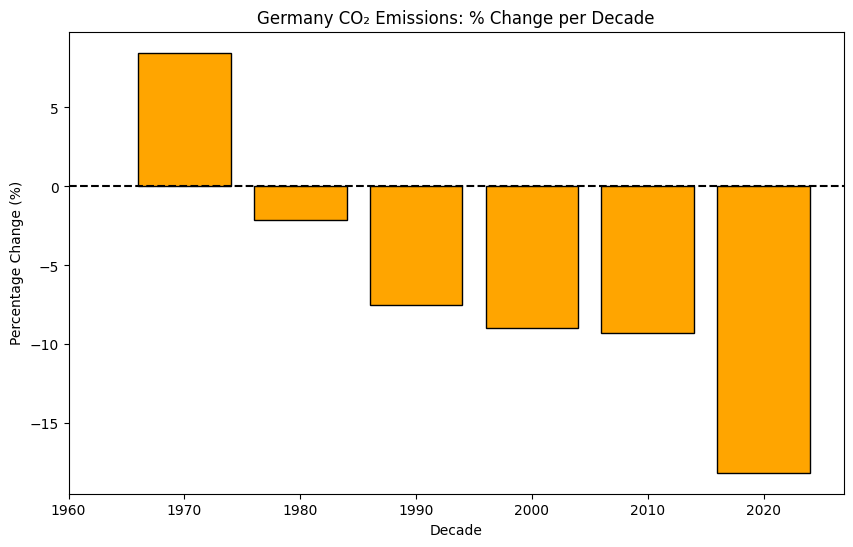

In [47]:
germany = df[["year", "co2"]].dropna().sort_values("year")

# Create decade column (e.g., 1990s, 2000s, etc.)
germany["decade"] = (germany["year"] // 10) * 10

# Calculate average CO₂ per decade
decade_avg = germany.groupby("decade")["co2"].mean().reset_index()

# --- Visualization 1: Bar Chart (average emissions per decade) ---
plt.figure(figsize=(10,6))
plt.bar(decade_avg["decade"], decade_avg["co2"], width=8, color="skyblue", edgecolor="black")
plt.title("Germany CO₂ Emissions (Decade Average)")
plt.xlabel("Decade")
plt.ylabel("Average CO₂ emissions (million tonnes)")
plt.xticks(decade_avg["decade"])
plt.show()

# --- Visualization 2: Line Chart (trend across decades) ---
plt.figure(figsize=(10,6))
plt.plot(decade_avg["decade"], decade_avg["co2"], marker="o", color="red", linewidth=2)
plt.title("Germany CO₂ Emissions Trend by Decade")
plt.xlabel("Decade")
plt.ylabel("Average CO₂ emissions (million tonnes)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# --- Visualization 3: Percentage Change between Decades ---
decade_avg["pct_change"] = decade_avg["co2"].pct_change() * 100

plt.figure(figsize=(10,6))
plt.bar(decade_avg["decade"], decade_avg["pct_change"], width=8, color="orange", edgecolor="black")
plt.axhline(0, color="black", linestyle="--")
plt.title("Germany CO₂ Emissions: % Change per Decade")
plt.xlabel("Decade")
plt.ylabel("Percentage Change (%)")
plt.xticks(decade_avg["decade"])
plt.show()